# **CHAPTER 4. Bayesian analysis: dating**

First and foremost create a directory to store all the data

In [ ]:
! mkdir data/

Launch `BEAUTi`

Upload:<br>
1. `../01_PanPhylo_analysis/phylogenomics/trimmed_MSAs/All/trimmed_family1.seq.aln`
2. `../01_PanPhylo_analysis/phylogenomics/trimmed_MSAs/All/trimmed_family2.seq.aln`
3. `../01_PanPhylo_analysis/phylogenomics/trimmed_MSAs/All/trimmed_family3.seq.aln`
4. `../01_PanPhylo_analysis/phylogenomics/trimmed_MSAs/All/trimmed_family4.seq.aln`
5. `../01_PanPhylo_analysis/phylogenomics/trimmed_MSAs/All/trimmed_family5.seq.aln`
6. `../01_PanPhylo_analysis/phylogenomics/trimmed_MSAs/All/trimmed_family6.seq.aln`
7. `../01_PanPhylo_analysis/phylogenomics/trimmed_MSAs/All/trimmed_family7.seq.aln`
8. `../01_PanPhylo_analysis/phylogenomics/trimmed_MSAs/All/trimmed_family8.seq.aln`
9. `../01_PanPhylo_analysis/phylogenomics/trimmed_MSAs/All/trimmed_family9.seq.aln`
10. `../01_PanPhylo_analysis/phylogenomics/trimmed_MSAs/All/trimmed_family10.seq.aln`
11. `../01_PanPhylo_analysis/phylogenomics/trimmed_MSAs/All/trimmed_family11.seq.aln`
12. `../01_PanPhylo_analysis/phylogenomics/trimmed_MSAs/All/trimmed_family12.seq.aln`
13. `../01_PanPhylo_analysis/phylogenomics/trimmed_MSAs/All/trimmed_family13.seq.aln`

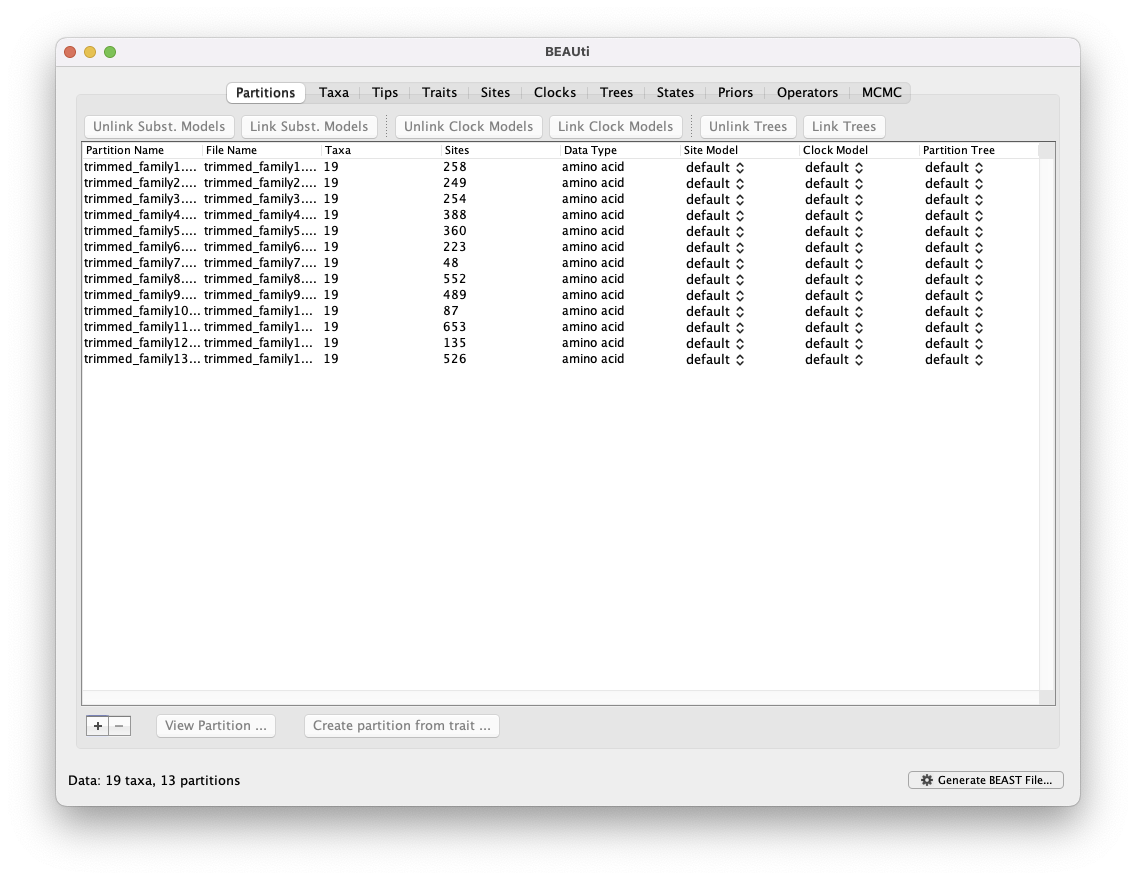

Select `mtREV` substitution model

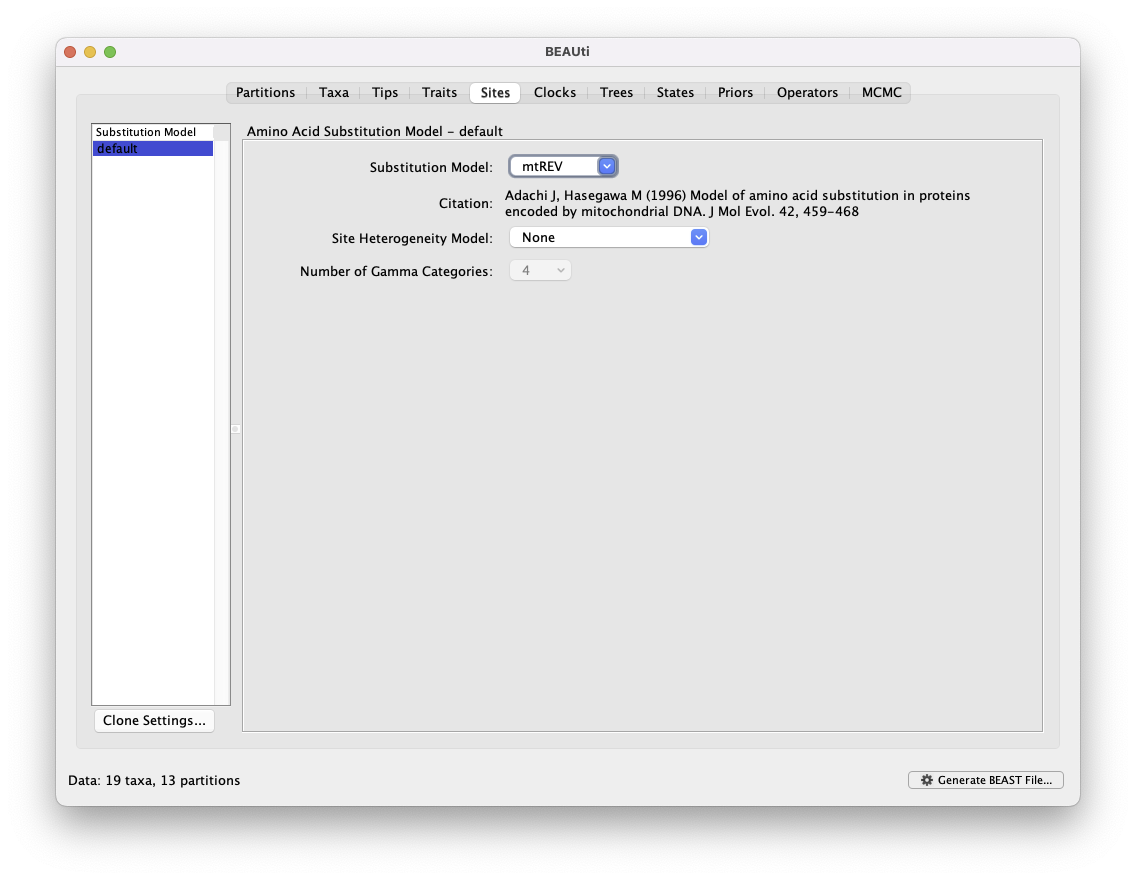

Go to the `Priors`

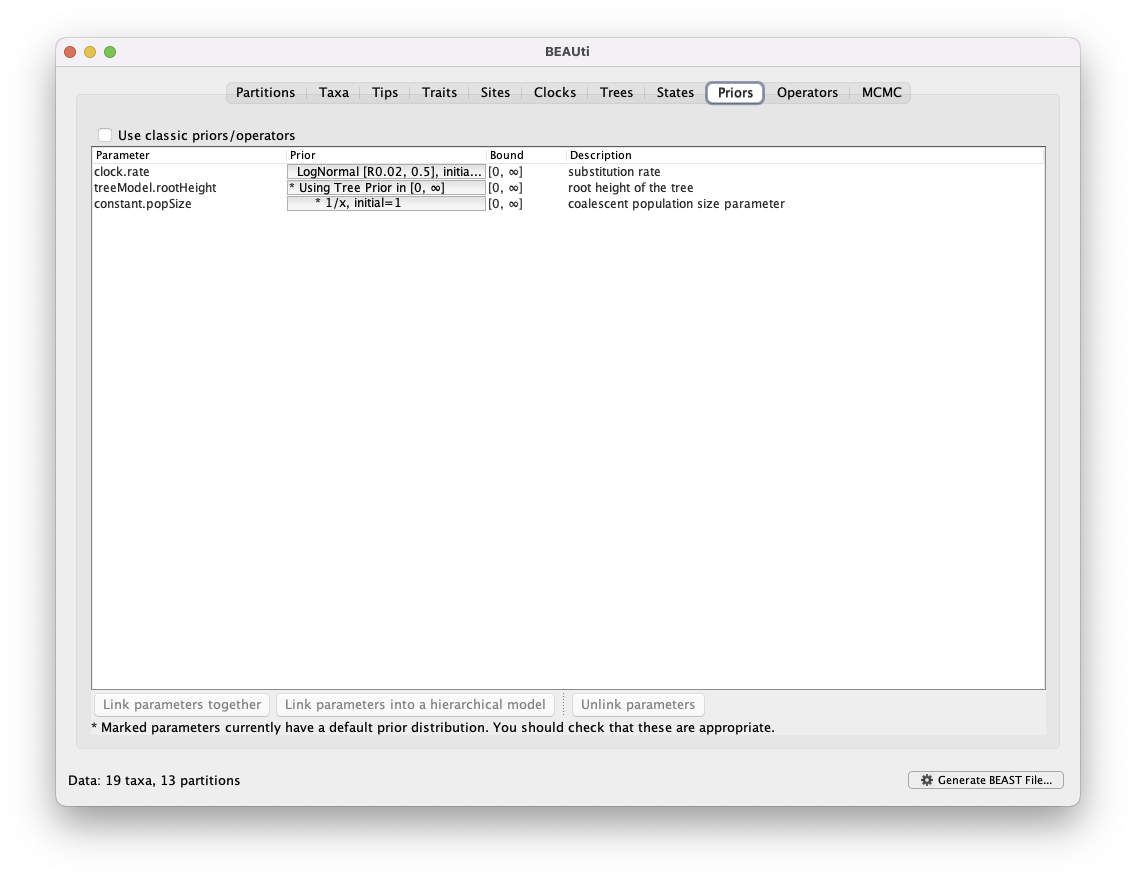

Set this setting for `clock.rate`

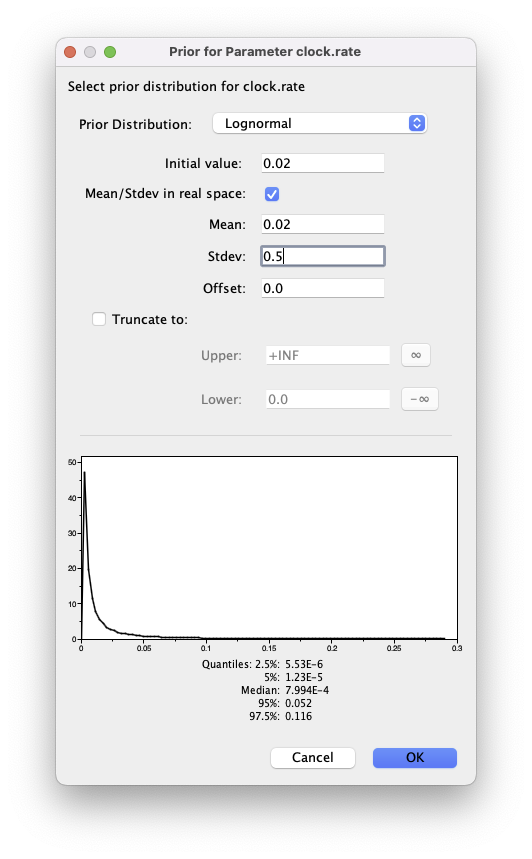

Set `100000000` for `Length of chain`<br>
And `10000` for `Log parameters every`

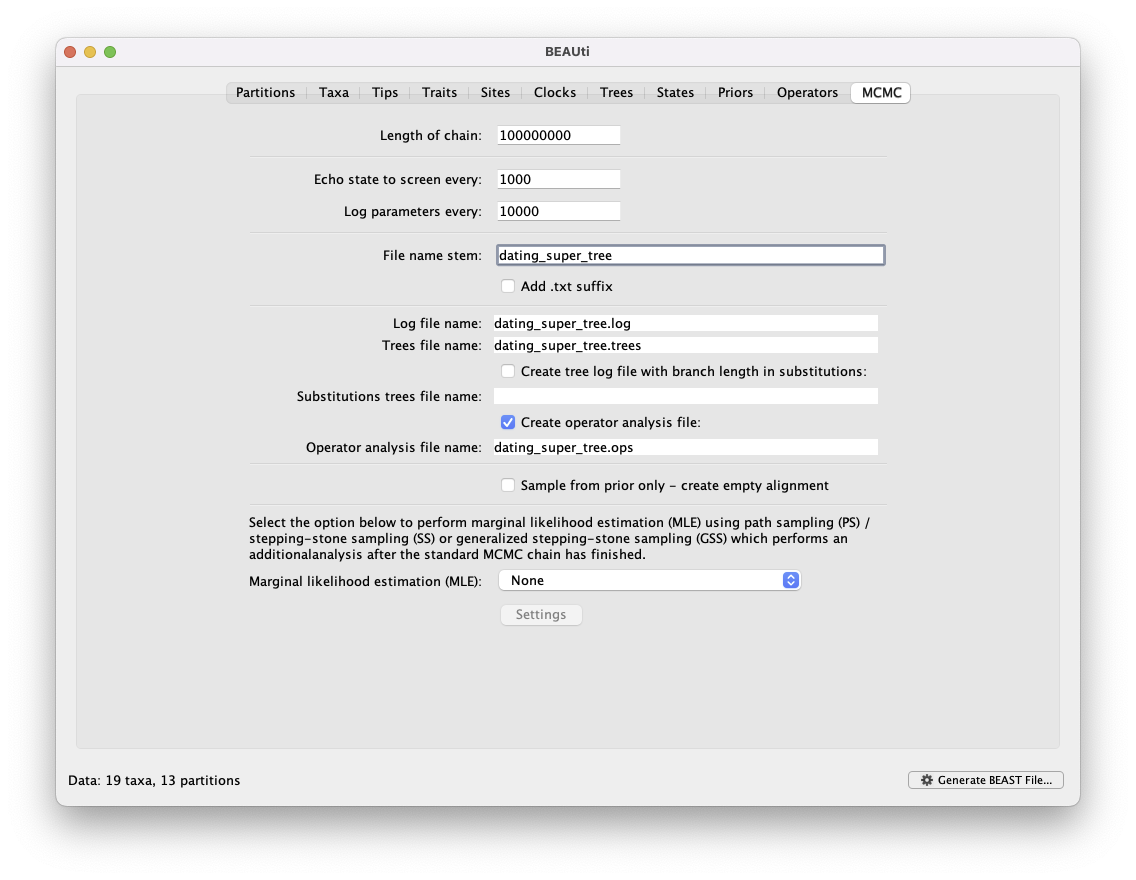

Click `Generate BEAST File...`

Lanch `BEAST`

In [ ]:
! beast data/dating_super_tree.xml

Now wait for 11 hours (valid for Mac Mini M4)

Mode all the files to `data/` directory

In [ ]:
! mv dating_super_tree.* data/

Launch `Tracer`

Go to `Terminal` and write `tracer`. Upload there `data/dating_tree.log`. Evaluate the tree!

Launch `TreeAnnotator`

Use this parameters:

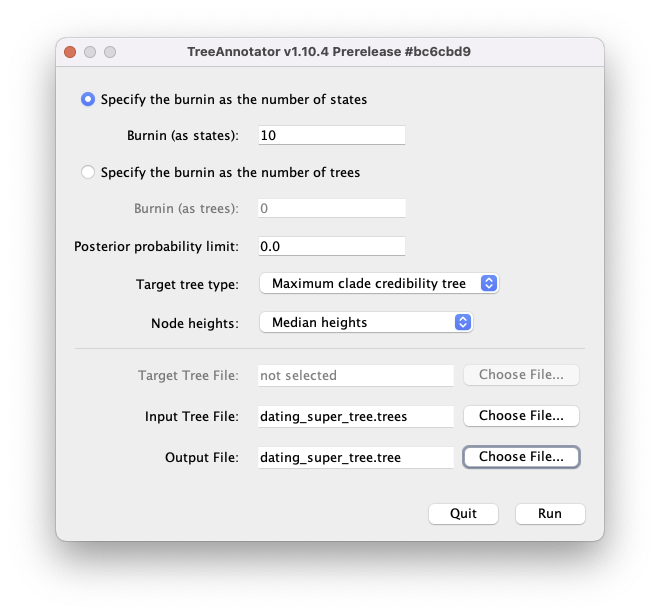

Click `Run`

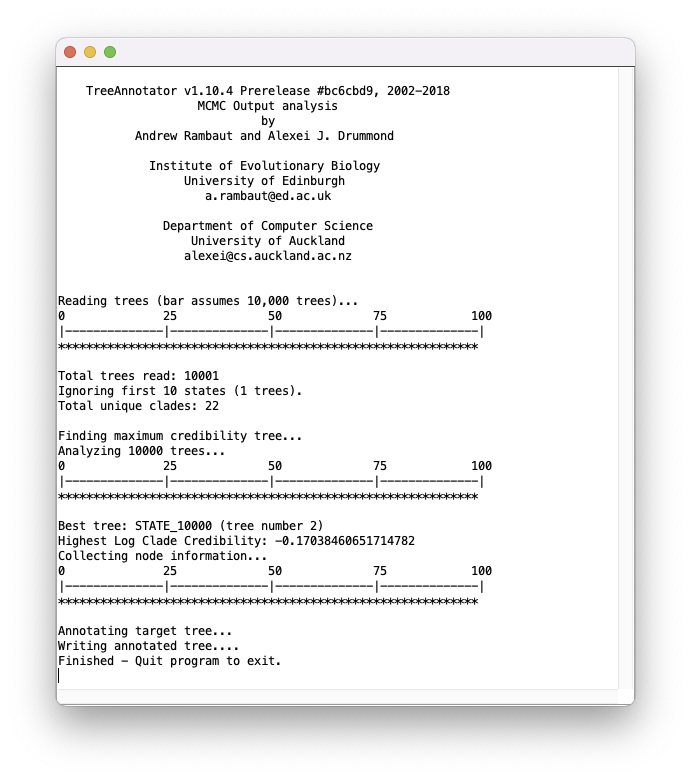

Good job!

Now we need to add `.1` to leaf labels of the tree

In [1]:
import re

In [2]:
def modify_nexus_labels(input_file, output_file):
    with open(input_file, 'r') as f:
        content = f.read()
    
    # Modify taxlabels
    taxlabels_match = re.search(r'(taxlabels\s+)([\s\S]+?)(;)', content, re.IGNORECASE)
    if taxlabels_match:
        taxlabels_section = taxlabels_match.group(2)
        modified_taxlabels = re.sub(r'(\S+)', r'\1.1', taxlabels_section)
        content = content.replace(taxlabels_section, modified_taxlabels)
    
    # Modify translate section
    translate_match = re.search(r'(translate\s+)([\s\S]+?)(;)', content, re.IGNORECASE)
    if translate_match:
        translate_section = translate_match.group(2)
        modified_translate = re.sub(r'(\d+\s+)(\S+)', r'\1\2.1', translate_section)
        content = content.replace(translate_section, modified_translate)
    
    with open(output_file, 'w') as f:
        f.write(content)
    
    print(f"Modified NEXUS file saved as: {output_file}")

In [3]:
# Usage
input_nexus = "dated_super_tree.tree"  # Replace with your actual file
output_nexus = "data/dating_super_tree_ready.tree"  # Replace with your desired output file
modify_nexus_labels(input_nexus, output_nexus)

Modified NEXUS file saved as: data/dating_super_tree_ready.tree


Now proceed to the `02_ggtree_journal.R` to visualize the dated tree!